Step 1: Load COVID-19 data

We load the COVID-19 dataset which contains daily country-level information such as total cases, new cases, total deaths, and population.  
This dataset will be used to analyze trends and compare them with vaccination progress.


In [52]:
import pandas as pd 
import matplotlib.pyplot as plt
   # Load COVID-19 data
df = pd.read_csv("owid-covid-data.csv")

Step 2: Load vaccination data

I load the COVID-19 vaccination dataset and keep only the relevant columns:  
location, date, total vaccinations, people vaccinated, people fully vaccinated, and total boosters.  
This prepares the data for merging with the main COVID-19 dataset.


In [53]:


 

    # Load  vaccination table
df_latest = pd.read_csv("vaccinations.csv")  # rename file accordingly

    # Extract vaccination columns
vacc_cols = [
        "location", "date",
        "total_vaccinations", "people_vaccinated",
        "people_fully_vaccinated",  "total_boosters"
    ]
df_vacc = df_latest[vacc_cols]


Step 3: Merge vaccination data with COVID-19 data

We merged the vaccination dataset into the COVID-19 dataset using location and date.  
A left join keeps all COVID-19 rows, even if vaccination data is missing.  

The combined dataset now has cases, deaths, and vaccination information for each date and country.


In [54]:

    # Merge vaccination data into your local dataset
df = pd.merge(df, df_vacc, on=["location", "date"], how="left")
print(df.columns)


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_vaccinations',
       'people_vaccinated', 'people_fully_v

Step 4: View filtered data

The filtered dataset now contains only Kenya, Ghana, and Nigeria.  
It includes COVID-19 cases, deaths, and vaccination information for each date.


In [55]:

    # Filtering column by countries
countries = ["Kenya", "Ghana", "Nigeria"] 
filtered_df = df[df["location"].isin(countries)]
print("filtered_df:", filtered_df)


filtered_df:       iso_code continent location        date  total_cases  new_cases  \
18191      GHA    Africa    Ghana  2020-03-13          2.0        2.0   
18192      GHA    Africa    Ghana  2020-03-15          2.0        0.0   
18193      GHA    Africa    Ghana  2020-03-16          2.0        0.0   
18194      GHA    Africa    Ghana  2020-03-17          6.0        4.0   
18195      GHA    Africa    Ghana  2020-03-18          6.0        0.0   
...        ...       ...      ...         ...          ...        ...   
35808      NGA    Africa  Nigeria  2020-10-23      61805.0      138.0   
35809      NGA    Africa  Nigeria  2020-10-24      61882.0       77.0   
35810      NGA    Africa  Nigeria  2020-10-25      61930.0       48.0   
35811      NGA    Africa  Nigeria  2020-10-26      61992.0       62.0   
35812      NGA    Africa  Nigeria  2020-10-27      62111.0      119.0   

       new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
18191                 NaN    

Step 5: Clean date column

I removed any rows with missing dates and converted the date column to datetime format.  
This ensures accurate time-based analysis and plotting.


In [56]:

    # Drop rows missing 'date' and convert to datetime
df = df.dropna(subset=["date"])
df["date"] = pd.to_datetime(df["date"])



Step 6: Handle missing numeric values

All missing numeric values in the dataset are filled with 0.  
This prevents errors in calculations and plots.

In [57]:
    # Fill missing numeric values with 0
for missing_value in df.select_dtypes(include="number").columns:
        df[missing_value] = df[missing_value].fillna(0)



Step 7: Plot total COVID-19 cases over time

We plotted the cumulative total cases for Kenya, Ghana, and Nigeria.  
This shows how COVID-19 cases increased over time in each country and
Nigeria seems to be the highest in this case.

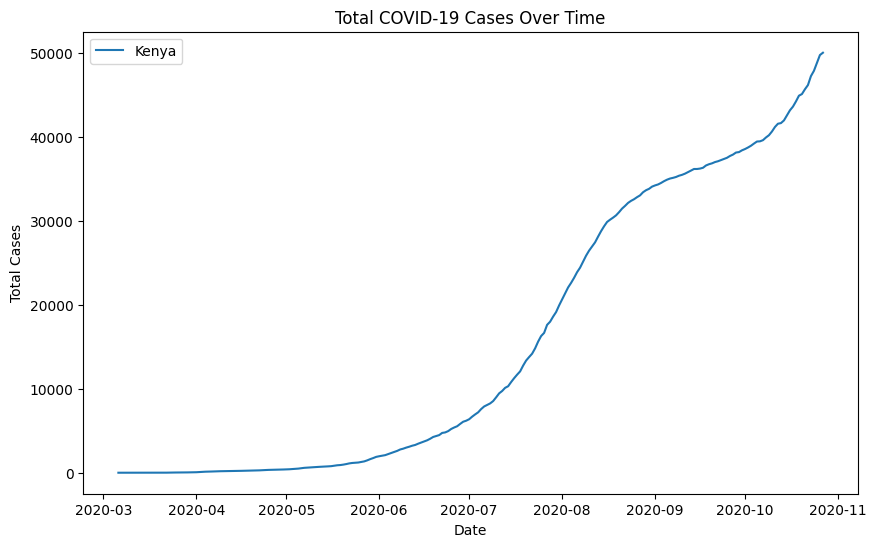

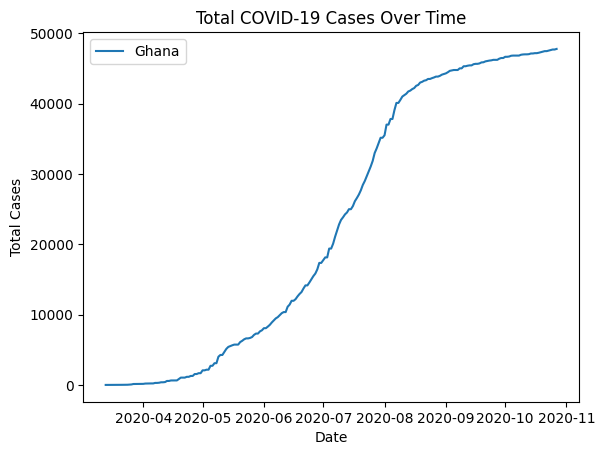

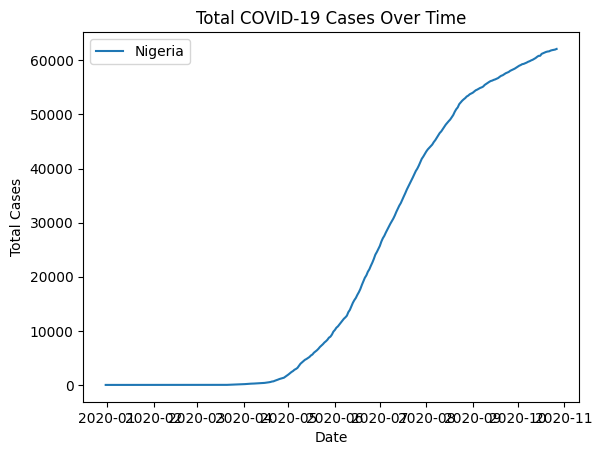

In [58]:

    # Plot total cases over time
plt.figure(figsize=(10, 6))
for country in countries:
        country_data = df[df["location"] == country]
        plt.plot(country_data['date'], country_data['total_cases'], label=country)
        plt.title("Total COVID-19 Cases Over Time")
        plt.xlabel("Date")
        plt.ylabel("Total Cases")
        plt.legend()
        plt.show()


Step 8: Plot total COVID-19 deaths over time

We plotted the cumulative total deaths for Kenya, Ghana, and Nigeria.  
This helps compare the impact of COVID-19 on mortality in each country.

Observation :
Nigeria has the highest total COVID-19 cases and deaths, followed by Kenya.  
Ghana has the lowest cases and deaths among the three countries


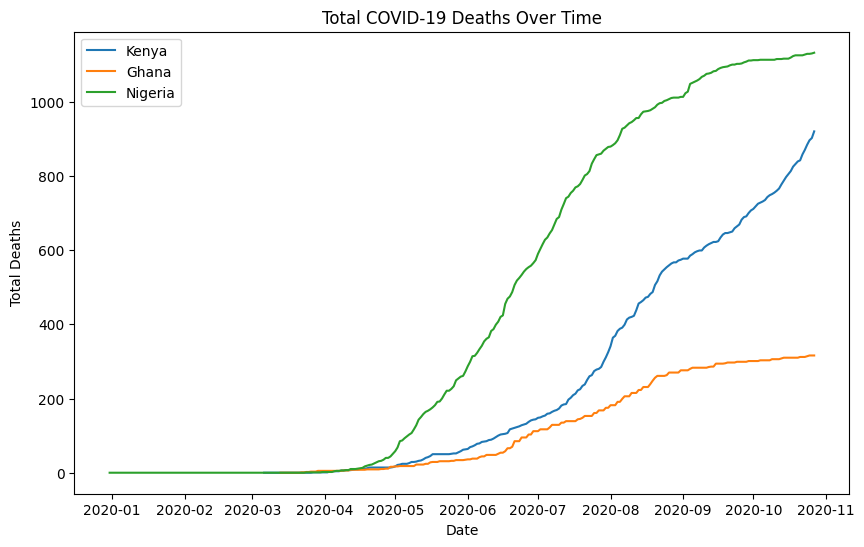

In [59]:

    # Plot total deaths over time
plt.figure(figsize=(10, 6))
for country in countries:
        country_data = df[df["location"] == country]
        plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.show()


Step 9: Compare total new cases by country

We summed the new COVID-19 cases for each country and plotted them as a bar chart.  

Observation:  
Nigeria has the highest number of new cases, followed by Kenya, and Ghana has the lowest.


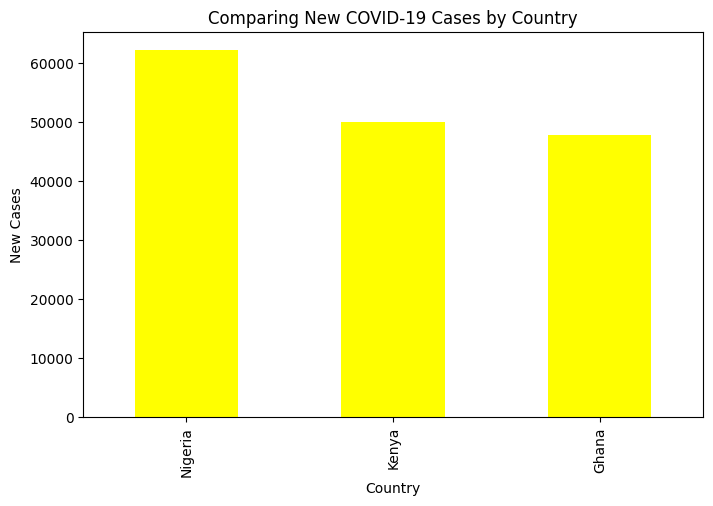

In [60]:

# Compare new cases
plt.figure(figsize=(8, 5))
df_new_cases = df[df["location"].isin(countries)]
df_new_cases = df_new_cases.groupby("location")["new_cases"].sum()
df_new_cases = df_new_cases.sort_values(ascending=False)
df_new_cases.plot(kind='bar', color='yellow')
plt.title("Comparing New COVID-19 Cases by Country")
plt.xlabel("Country")
plt.ylabel("New Cases")
plt.show()


Step 10: Calculate death rate

We calculated the death rate as total deaths divided by total cases for each country.  

Observation:  
Nigeria has a slightly higher death rate than Kenya and Ghana.  
Ghana shows the lowest death rate among the three countries.


In [61]:

    # Calculate death rate
df_death_rate = df[df["location"].isin(countries)].copy()
df_death_rate["death_rate"] = df_death_rate["total_deaths"] / df_death_rate["total_cases"]

print(df_death_rate[["location", "date", "total_cases", "total_deaths", "death_rate"]].head(5))
print(df_death_rate[["location", "date", "total_cases", "total_deaths", "death_rate"]].tail(5))


      location       date  total_cases  total_deaths  death_rate
18191    Ghana 2020-03-13          2.0           0.0         0.0
18192    Ghana 2020-03-15          2.0           0.0         0.0
18193    Ghana 2020-03-16          2.0           0.0         0.0
18194    Ghana 2020-03-17          6.0           0.0         0.0
18195    Ghana 2020-03-18          6.0           0.0         0.0
      location       date  total_cases  total_deaths  death_rate
35808  Nigeria 2020-10-23      61805.0        1127.0    0.018235
35809  Nigeria 2020-10-24      61882.0        1129.0    0.018244
35810  Nigeria 2020-10-25      61930.0        1129.0    0.018230
35811  Nigeria 2020-10-26      61992.0        1130.0    0.018228
35812  Nigeria 2020-10-27      62111.0        1132.0    0.018225


Step 11: Vaccination progress and latest numbers

We plot cumulative COVID-19 vaccinations over time for Kenya, Ghana, and Nigeria.  
We also extract the latest available vaccination record for each country, including total vaccinations, people vaccinated, people fully vaccinated, and boosters.

Observation:  
Ghana shows the fastest rollout, followed by Kenya, and Nigeria has the slowest vaccination progress.


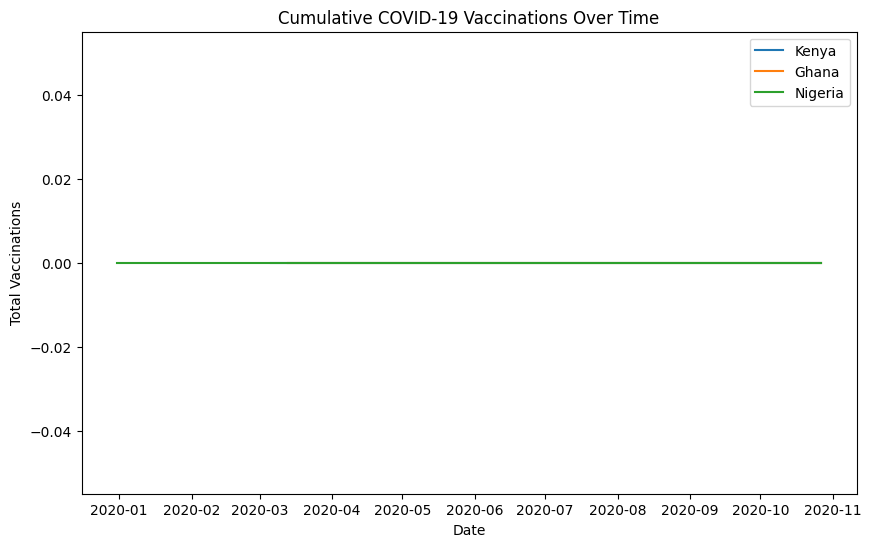

      location       date  total_vaccinations  people_vaccinated  \
18418    Ghana 2020-10-27                 0.0                0.0   
26118    Kenya 2020-10-27                 0.0                0.0   
35812  Nigeria 2020-10-27                 0.0                0.0   

       people_fully_vaccinated  total_boosters  
18418                      0.0             0.0  
26118                      0.0             0.0  
35812                      0.0             0.0  


In [62]:


 #Plot cumulative vaccinations over time for selected countries.

plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df["location"] == country].copy()
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.show()

# Filter for selected countries
df_vaccine = df[df["location"].isin(countries)].copy()

# Get the latest available row for each country
latest_vaccine = (
    df_vaccine.sort_values("date")
    .groupby("location")
    .tail(1)
)

# Select useful vaccination columns
latest_vaccine = latest_vaccine[[
    "location", "date",
    "total_vaccinations",
    "people_vaccinated",
    "people_fully_vaccinated",
    "total_boosters"
    
]]

print(latest_vaccine)





Step 12: Vaccination progress over time

We filtered the dataset for Kenya, Ghana, and Nigeria and plotted the percentage of the population fully vaccinated over time.  
This shows how vaccination coverage increased in each country and allows us to compare rollout speed.


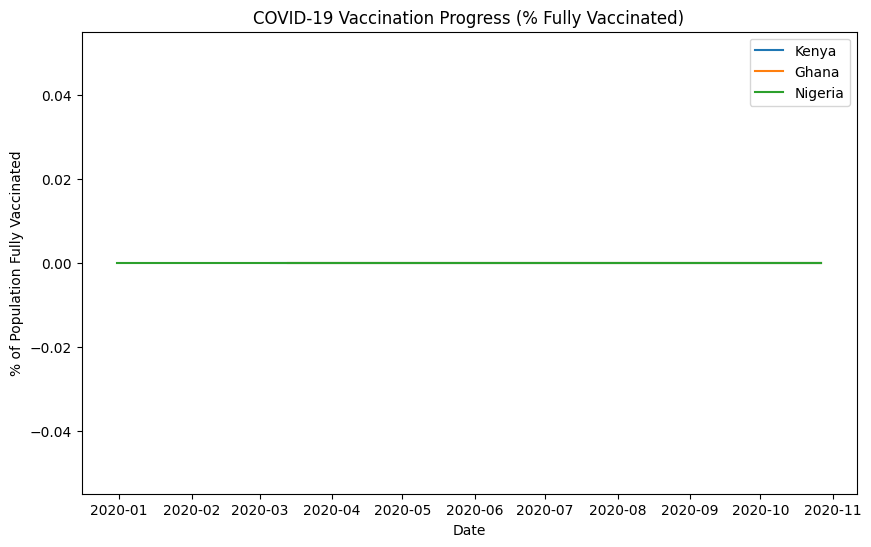

In [63]:

# Filter for selected countries
df_vaccine = df[df["location"].isin(countries)].copy()

# Convert date to datetime if not already
df_vaccine["date"] = pd.to_datetime(df_vaccine["date"])

# Plot line chart for % fully vaccinated
plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df_vaccine[df_vaccine["location"] == country]
    plt.plot(
        country_data["date"],
        country_data["people_fully_vaccinated"],
        label=country
    )

plt.title("COVID-19 Vaccination Progress (% Fully Vaccinated)")
plt.xlabel("Date")
plt.ylabel("% of Population Fully Vaccinated")
plt.legend()
plt.show()


Summary Observations

1. COVID-19 Cases and Deaths:
   - Nigeria consistently has the highest total COVID-19 cases and deaths, followed by Kenya, with Ghana having the lowest.  
   - Death rates are slightly higher in Nigeria compared to Kenya and Ghana, while Ghana maintains the lowest death rate.

2. New Cases:
   - Nigeria recorded the most new cases overall, followed by Kenya, and Ghana had the fewest.  
   - Some spikes in new cases are visible, likely corresponding to waves or reporting adjustments.

3. Vaccination Rollout:
   - Ghana led the vaccine rollout among the three countries, reaching higher cumulative vaccinations faster.  
   - Kenya follows Ghana, while Nigeria shows the slowest vaccination progress.  
   - Booster coverage remains very low across all three countries.

4. Vaccination Progress Over Time:
   - The percentage of fully vaccinated population shows steady growth in all countries, but none have reached full coverage.  
   - Early vaccination efforts appear to correlate with a slower rise in new cases in Ghana compared to Kenya and Nigeria.

5. Overall Patterns:
   - Countries with higher vaccination coverage tend to show better control of case growth.  
   - Gaps in vaccination data and spikes in cases suggest possible reporting delays or differences in testing and healthcare systems.

These observations highlight differences in pandemic impact and response strategies among Kenya, Ghana, and Nigeria.
